## Outlier Analysis using Gaussian Mixture

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from matplotlib.colors import LogNorm
from sklearn import mixture


## Create synthetic data

In [3]:
X = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               random_state=42, n_samples=270, n_features=2)[0]
rng = np.random.RandomState(42)
X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(30, 2))], axis=0)

Since the above data has been synthetically created, there is no need for any data preprocessing and EDA

## Application of Gaussian Mixture

In [4]:
model = mixture.GaussianMixture(n_components = 2, covariance_type = 'full', random_state = 1337)
model.fit(X)

GaussianMixture(n_components=2, random_state=1337)

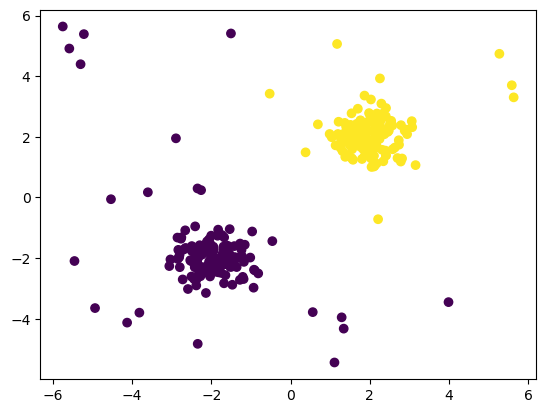

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X))
plt.show()

The model has split the data into the following clusters, while obvious outliers can be seen, let's see how the algorithm scores the data points

In [10]:
scores = model.score_samples(X)
scores

array([ -2.81847288,  -3.17262657,  -2.85128638,  -1.96917362,
        -2.89931319,  -2.60965694,  -2.09402174,  -2.95331108,
        -2.61093492,  -3.08016328,  -2.1435851 ,  -2.91841791,
        -3.06881247,  -2.04356712,  -2.64052432,  -2.05600461,
        -2.228011  ,  -2.91242786,  -3.00268734,  -2.8855388 ,
        -2.3590944 ,  -2.82180574,  -2.14259834,  -3.37523681,
        -2.17881082,  -2.84213545,  -3.25217982,  -2.12540237,
        -2.08016024,  -2.5533438 ,  -3.09933076,  -2.92742263,
        -2.27415344,  -3.00776032,  -2.1620182 ,  -2.8524508 ,
        -2.95639274,  -2.0072755 ,  -3.2308145 ,  -2.88182885,
        -2.67676322,  -2.00075441,  -2.5516557 ,  -1.97390698,
        -2.13330934,  -2.12084083,  -3.35210478,  -2.91923718,
        -2.87643126,  -3.68947182,  -2.64691982,  -3.25793387,
        -2.07035462,  -2.77545707,  -2.8380568 ,  -2.2739184 ,
        -2.05046538,  -2.97563384,  -2.71642965,  -2.1308278 ,
        -3.15180949,  -3.1353312 ,  -2.73651939,  -3.41

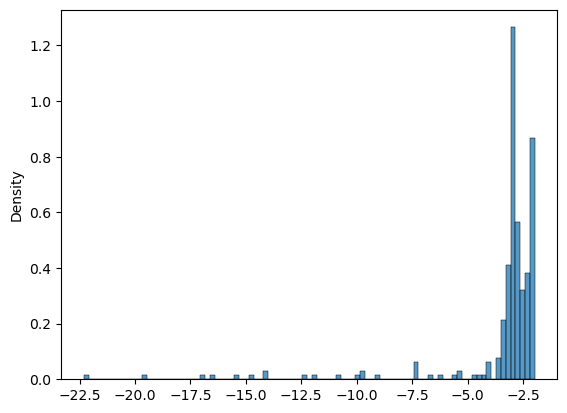

In [11]:
sns.histplot(model.score_samples(X), stat='density');


The following histogram is the density of data points corresponding to the scores given by the alogirthm. The more negative a score, the lesser likely the probability of the data point in being part of a cluster

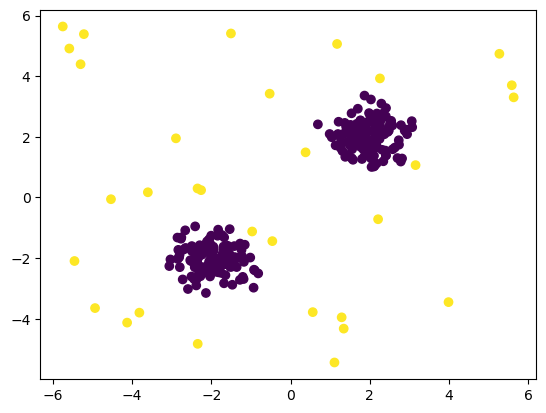

In [13]:
is_outlier = model.score_samples(X) < (-4)

plt.scatter(X[:, 0], X[:, 1], c= is_outlier)
plt.show()

From the above it is clear how well the algorithm has done in indentifying the outliers. Setting a threshold of 4( done by eye balling has helped remove most, if not all outliers)

***Note*** - The threshold score is based on specific domain requirments and what is deemed as effecient. Using a more negative threshold will result in higher purity of the data, but will also result in loss of information. It is important to find a middle ground to ensure purity and maintain as much information as possible.